In [1]:
import numpy as np
import scipy.stats as sstats
from matplotlib import pyplot as plt

In [2]:
plt.xkcd()

In [3]:
import cbayes.sample as samp
import cbayes.distributions as dist
import cbayes.solve as solve

In [4]:
def QoI_fun(lam):
    return np.power(lam, 5).reshape(-1, 1)

## Consistent Bayes

In [8]:
N = 5000
input_dim = 1
output_dim = input_dim
s_set = samp.sample_set(input_dim)
for i in range(input_dim):# define prior distribution
    s_set.set_dist('uni', {'loc':-1, 'scale':2}, 0) # uniform
#     s_set.set_dist('norm', {'loc':0, 'scale':0.5}, 0) # normal distribution 
s_set.generate_samples(N)
p_set = samp.map_samples_and_create_problem(s_set, QoI_fun)

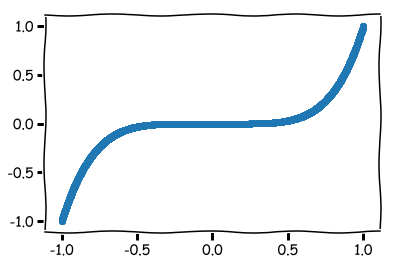

In [9]:
plt.scatter(p_set.input.samples[:], p_set.output.samples[:])
plt.show()

In [11]:
sd = 0.01
lo = 0.25
p_set.set_observed_dist('norm', dim=0, kwds={'loc':lo, 'scale': sd})
# FIX THE BUG WHERE YOU CANNOT OVERWRITE THIS... (didn't I already do this?... maybe just forgot to apply it to the observed dist part)

In [15]:
p_set.compute_pushforward_dist()

In [16]:
pf = p_set.pushforward_dist

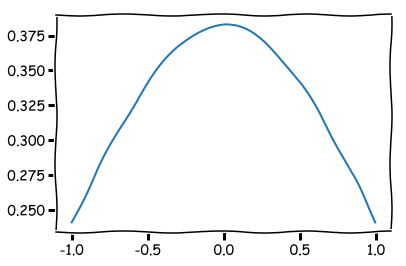

In [17]:
x = np.linspace(-1,1,100)
plt.plot(x,pf.pdf(x))

In [ ]:
p_set.set_ratio()

In [ ]:
solve.problem(p_set)

In [ ]:
plt.scatter(p_set.input.samples, p_set.ratio)
plt.show()

## Statistical Bayes

In [ ]:
D = dist.parametric_dist(output_dim)
for i in range(output_dim):
    D.set_dist(i, 'norm',{'loc':lo, 'scale':sd })


In [ ]:
likelihood = D.pdf(p_set.output.samples)
prior = p_set.input.dist.pdf(p_set.input.samples)

In [ ]:
post = likelihood*prior

In [ ]:
plt.scatter(p_set.input.samples, post)
plt.show()

In [ ]:
PS = post/np.max(post)
PC = p_set.ratio/np.max(p_set.ratio)
ps = np.concatenate([s_set.samples, PS.reshape(-1,1)], axis=1)
pc = np.concatenate([s_set.samples, PC.reshape(-1,1)], axis=1)

In [ ]:
x = np.linspace(0,1,10)

In [ ]:
plt.scatter(p_set.input.samples, PC, c='b')
plt.scatter(p_set.input.samples, PS, c='g')
plt.show()

In [ ]:
indS = solve.perform_accept_reject(s_set.samples, post)
indC = solve.perform_accept_reject(s_set.samples, p_set.ratio)

In [ ]:
# indS

In [ ]:
# indC

In [ ]:
import seaborn as sb

In [ ]:
sb.distplot(p_set.output.samples[indS], color='g', bins=20)
sb.distplot(p_set.output.samples[indC], color='b', bins=20)

In [ ]:
s_set.samples[indS].reshape(1,-1)